In [1]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
with open('data/train.csv') as f:
    clean_file = [line for line in map(lambda s: s.strip().replace('"', ''), f.readlines()) if line != '']

with open('data/train_clean.csv', 'w') as f:
    f.write('\n'.join(clean_file))

In [3]:
train = pd.read_csv('data/train_clean.csv')

In [4]:
train.shape

(26884, 25)

The dataset has 26884 rows and 25 columns

In [5]:
train.columns

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')

Columns:
- CUST_COD : customer code
- LIMIT_BAL : Amount of credit card given to the client
- SEX : gender
- EDUCATION : education level
- MARRIAGE : marital status
- BIRTH_DATE : birthdate
- PAY_DEC, PAY_NOV, PAY_OCT, PAY_SEP, PAY_AUG, PAY_JUL : history of payments. 1 = 1 month delay, 2 = 2 months delay...
- BILL_AMT_DEC, BILL_AMT_NOV, BILL_AMT_OCT, BILL_AMT_SEP, BILL_AMT_AUG, BILL_AMT_JUL : amount of bill statement per month
- PAY_AMT_DEC, PAY_AMT_NOV, PAY_AMT_OCT, PAY_AMT_SEP, PAY_AMT_AUG, PAY_AMT_JUL : amount of payment per month
- DEFAULT PAYMENT JAN : default payment on January 1 = yes, 0 = no

# LIMIT_BAL

In [6]:
train['LIMIT_BAL'].describe()

count    26884.00000
mean      4997.91411
std       3879.73624
min        298.13600
25%       1490.68000
50%       4173.90400
75%       7155.26400
max      29813.60000
Name: LIMIT_BAL, dtype: float64

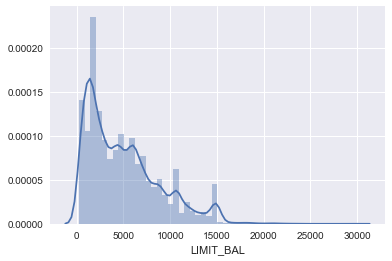

In [7]:
sns.distplot(train['LIMIT_BAL'])

In [8]:
print("Number of null values: {0}".format(train['LIMIT_BAL'].isnull().sum()))

Number of null values: 0


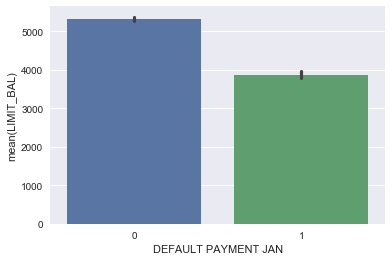

In [9]:
sns.barplot(x='DEFAULT PAYMENT JAN', y='LIMIT_BAL', data=train)

If the balance is higher, there is lower probability to default. That seems reasonable

# SEX

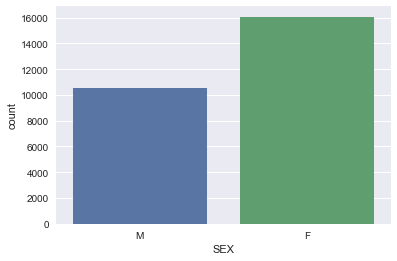

In [10]:
sns.countplot(x='SEX', data=train)

There are more females than males

In [11]:
males = (train['SEX'] == 'M').sum()
females = (train['SEX'] == 'F').sum()
sex_nulls = (train['SEX'].isnull()).sum()

print("Number of males: {0}".format(males))
print("Number of females: {0}".format(females))
print("Number of nulls: {0}".format(sex_nulls))

print("\nSum: {0} / {1}".format(males + females + sex_nulls, len(train)))

Number of males: 10555
Number of females: 16071
Number of nulls: 258

Sum: 26884 / 26884


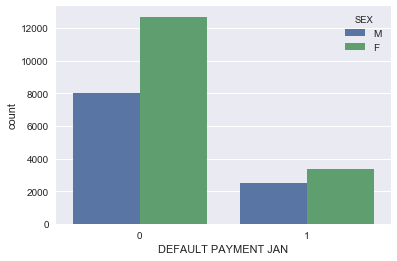

In [12]:
sns.countplot(x='DEFAULT PAYMENT JAN', hue='SEX', data=train)

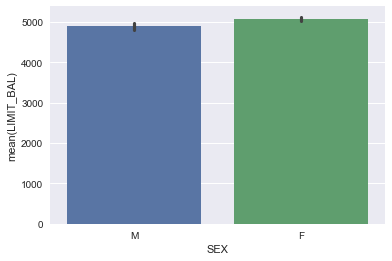

In [13]:
sns.barplot(x = 'SEX', y = 'LIMIT_BAL', data=train)

Males and females have quite the same initial balance

In [14]:
pd.crosstab(train['SEX'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
SEX,,
F,0.790119,0.209881
M,0.761440,0.238560


Females have ~21% probability to default, while males have a slightly higher probability to default (~24%)

# EDUCATION

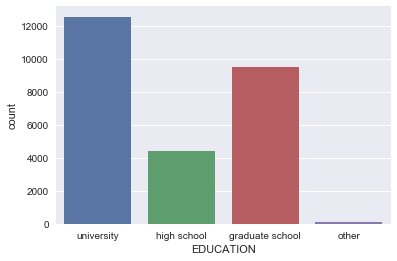

In [15]:
sns.countplot(x='EDUCATION', data=train)

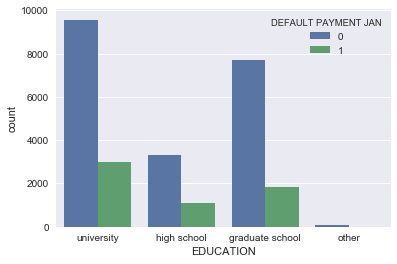

In [16]:
sns.countplot(x = 'EDUCATION', hue='DEFAULT PAYMENT JAN', data=train)

In [17]:
pd.crosstab(train['EDUCATION'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
EDUCATION,,
graduate school,0.808036,0.191964
high school,0.749546,0.250454
other,0.936937,0.063063
university,0.762057,0.237943


In [18]:
pd.crosstab(train['EDUCATION'], train['DEFAULT PAYMENT JAN'])

DEFAULT PAYMENT JAN,0,1
EDUCATION,,
graduate school,7682,1825
high school,3304,1104
other,104,7
university,9560,2985


There is no high correlation between having an education and go in default. Those with 'other' education may be outliers.

Note in fact that the baseline is 80% - 20%

In [19]:
print ("Num of missing values: {0}".format((train['EDUCATION'].isnull()).sum()))

Num of missing values: 313


Ugh there are some missing values...

# MARRIAGE

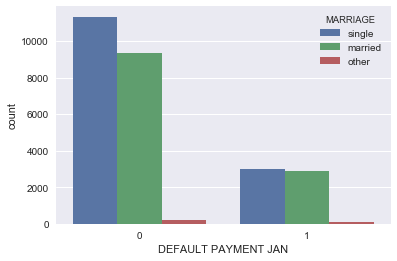

In [20]:
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'MARRIAGE', data=train)

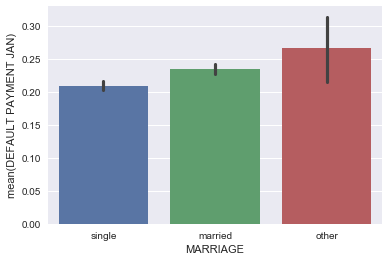

In [21]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'MARRIAGE', data=train)

Singles have slightly higher probability of not being insolvent than married ones.

In [22]:
print("Number of missing values: {0}".format(train['MARRIAGE'].isnull().sum()))

Number of missing values: 50


# BIRTHDATE

Instead of bithdate consider the age (in years)

In [23]:
birthdates = train['BIRTH_DATE']

In [24]:
print("Number of missing values: {0}".format(birthdates.isnull().sum()))

Number of missing values: 702


In [25]:
import datetime
def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

birthdates = birthdates.apply(get_age)

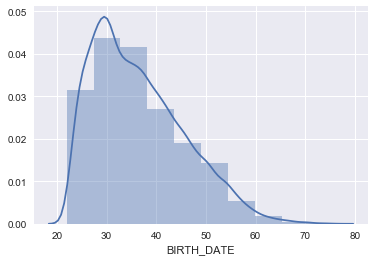

In [26]:
sns.distplot(birthdates[~birthdates.isnull()], bins=10)

In [27]:
train['AGE'] = birthdates

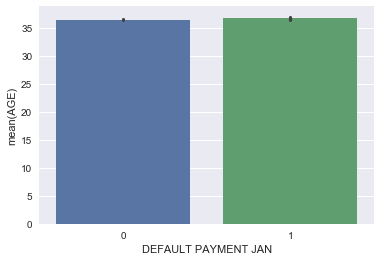

In [28]:
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'AGE', data=train)

There is no significant difference of age between insolvents and non insolvents

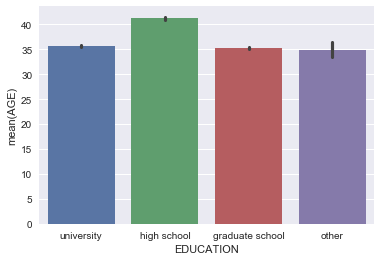

In [29]:
sns.barplot(x = 'EDUCATION', y = 'AGE', data=train)

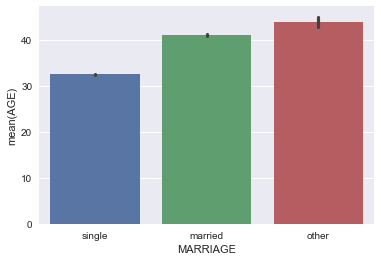

In [30]:
sns.barplot(x = 'MARRIAGE', y = 'AGE', data=train)

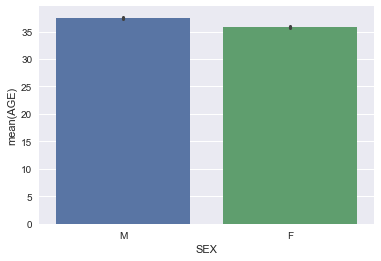

In [31]:
sns.barplot(x = 'SEX', y = 'AGE', data=train)

# PAY_*

In [32]:
def aggregate_payment(x):
    return x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'] + x['PAY_AUG'] + x['PAY_SEP'] + x['PAY_JUL']

def aggregate_payment_normalized(x):
    cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
    ret = 0
    for c in cols:
        if x[c] > 0:
            ret += 1
        elif x[c] < 0:
            ret -= 1
    return ret
            
train['PAY_SUM'] = train.apply(aggregate_payment, axis=1)
train['PAY_SUM_NORM'] = train.apply(aggregate_payment_normalized, axis=1)

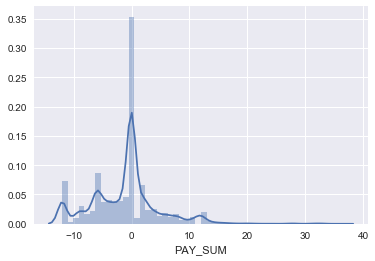

In [33]:
sns.distplot(train['PAY_SUM'])

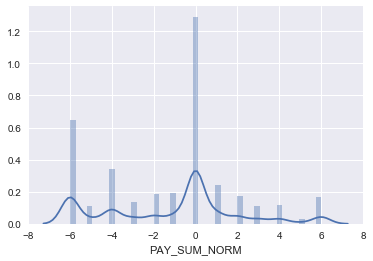

In [34]:
sns.distplot(train['PAY_SUM_NORM'])

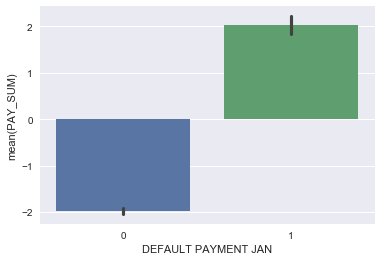

In [35]:
sns.barplot(y='PAY_SUM', x='DEFAULT PAYMENT JAN', data=train)

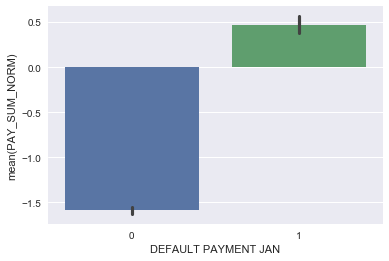

In [36]:
sns.barplot(y='PAY_SUM_NORM', x='DEFAULT PAYMENT JAN', data=train)

In [37]:
def predict_default(pay_sum):
    if pay_sum > 0:
        return 1
    return 0

prediction = train['PAY_SUM'].apply(predict_default)
prediction_norm = train['PAY_SUM_NORM'].apply(predict_default)

In [38]:
from sklearn.metrics import accuracy_score
pay_sum_acc = accuracy_score(prediction, train['DEFAULT PAYMENT JAN'])
pay_sum_acc_norm = accuracy_score(prediction_norm, train['DEFAULT PAYMENT JAN'])

print ("Accuracy for sum: {0}\nAccuracy for sum normalized: {1}".format(pay_sum_acc, pay_sum_acc_norm))

Accuracy for sum: 0.772132123195953
Accuracy for sum normalized: 0.7759262014581163


In [39]:
def has_paid_most_times(x):
    if x == 0:
        return 'PAY REGULAR'
    if x > 0:
        return 'PAY LATE'
    if x < 0:
        return 'PAY EARLY'

train['PAYER_TYPE'] = train['PAY_SUM_NORM'].apply(has_paid_most_times)

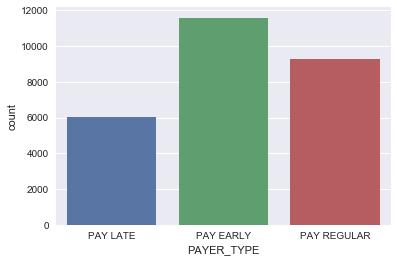

In [40]:
sns.countplot(x = 'PAYER_TYPE', data = train)

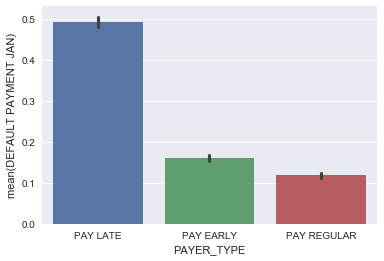

In [41]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAYER_TYPE', data = train)

It is reasonable that the ones that have paid late most of the times has a higher chance of becoming insolvent in January

**TODO** Try to give some weights, since the payments in Dec and Nov are more meaningful than the ones in Jul. Maybe check the first derivative of the series.

In [45]:
def avg_payments(columns):
    def ret(x):
        retval = 0
        for c in columns:
            retval += x[c]
        return retval / len(columns)
    return ret

def aggregate_last_payments(x):
    #return (x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'])/3
    return avg_payments(['PAY_DEC', 'PAY_OCT', 'PAY_NOV'])
def aggregate_first_payments(x):
    return (x['PAY_JUL'] + x['PAY_AUG'] + x['PAY_SEP'])/3
def aggregate_avg_payments(x):
    return (x['PAY_JUL'] + x['PAY_AUG'] + x['PAY_SEP'] + x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'])/6

train['PAY_LAST_3'] = train.apply(avg_payments(['PAY_DEC', 'PAY_OCT', 'PAY_NOV']), axis=1)
train['PAY_FIRST_3'] = train.apply(avg_payments(['PAY_JUL', 'PAY_AUG', 'PAY_SEP']), axis=1)
train['PAY_AVG'] = train.apply(avg_payments(['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']), axis=1)

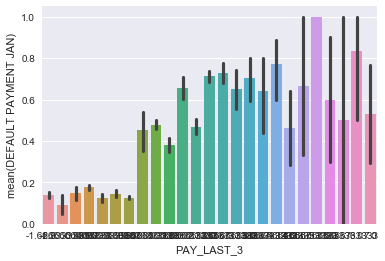

In [46]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAY_LAST_3', data=train)

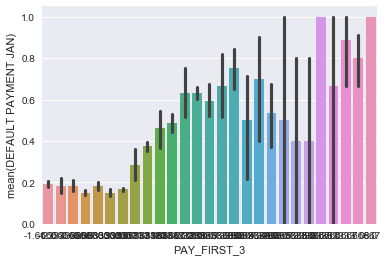

In [47]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAY_FIRST_3', data=train)

In [48]:
train['PAY_LAST_3_CAT'] = pd.qcut(train['PAY_LAST_3'], q=3, labels=['PAY_EARLY', 'PAY_REG', 'PAY_LATE'])
train['PAY_FIRST_3_CAT'] = pd.qcut(train['PAY_FIRST_3'], q=3, labels=['PAY_EARLY', 'PAY_REG', 'PAY_LATE'])
train['PAY_AVG_CAT'] = pd.qcut(train['PAY_AVG'], q=3, labels=['PAY_EARLY', 'PAY_REG', 'PAY_LATE'])

In [50]:
pd.crosstab(train['DEFAULT PAYMENT JAN'], [train['PAY_AVG_CAT'], train['PAY_LAST_3_CAT']], normalize=1)

PAY_AVG_CAT         PAY_EARLY                       PAY_REG            \
PAY_LAST_3_CAT      PAY_EARLY   PAY_REG  PAY_LATE PAY_EARLY   PAY_REG   
DEFAULT PAYMENT JAN                                                     
0                    0.844027  0.826793  0.433735   0.87169  0.888612   
1                    0.155973  0.173207  0.566265   0.12831  0.111388   

PAY_AVG_CAT                    PAY_LATE                      
PAY_LAST_3_CAT       PAY_LATE PAY_EARLY   PAY_REG  PAY_LATE  
DEFAULT PAYMENT JAN                                          
0                    0.605263  0.730337  0.771357  0.450594  
1                    0.394737  0.269663  0.228643  0.549406

In [51]:
train.groupby(['PAY_FIRST_3_CAT', 'PAY_LAST_3_CAT', 'PAY_AVG_CAT'])['DEFAULT PAYMENT JAN'].count().unstack()

PAY_AVG_CAT                     PAY_EARLY  PAY_REG  PAY_LATE
PAY_FIRST_3_CAT PAY_LAST_3_CAT                              
PAY_EARLY       PAY_EARLY          7429.0      NaN       NaN
                PAY_REG             739.0    520.0       NaN
                PAY_LATE             83.0    252.0     128.0
PAY_REG         PAY_EARLY           908.0    851.0       NaN
                PAY_REG               NaN   9526.0       NaN
                PAY_LATE              NaN     14.0    2109.0
PAY_LATE        PAY_EARLY            17.0    131.0      89.0
                PAY_REG               NaN      NaN    1194.0
                PAY_LATE              NaN      NaN    2894.0

In [52]:
train.groupby(['PAY_FIRST_3_CAT', 'PAY_LAST_3_CAT', 'PAY_AVG_CAT'])['DEFAULT PAYMENT JAN'].mean().unstack()

PAY_AVG_CAT                     PAY_EARLY   PAY_REG  PAY_LATE
PAY_FIRST_3_CAT PAY_LAST_3_CAT                               
PAY_EARLY       PAY_EARLY        0.160048       NaN       NaN
                PAY_REG          0.173207  0.165385       NaN
                PAY_LATE         0.566265  0.388889  0.515625
PAY_REG         PAY_EARLY        0.117841  0.105758       NaN
                PAY_REG               NaN  0.108440       NaN
                PAY_LATE              NaN  0.500000  0.465149
PAY_LATE        PAY_EARLY        0.411765  0.274809  0.269663
                PAY_REG               NaN       NaN  0.228643
                PAY_LATE              NaN       NaN  0.612301

In [53]:
x = pd.qcut(train['PAY_LAST_3'], q=3)
pd.crosstab(train['DEFAULT PAYMENT JAN'], x, normalize=1)

PAY_LAST_3,"[-2, -0.333]","(-0.333, 0]","(0, 7]"
DEFAULT PAYMENT JAN,,,
0,0.845836,0.873111,0.457847
1,0.154164,0.126889,0.542153


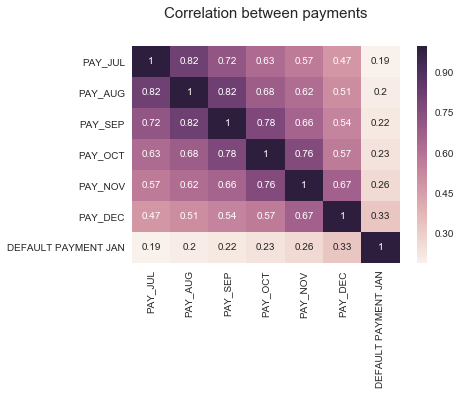

In [54]:
plt.title('Correlation between payments', size=15, y=1.1)
sns.heatmap(train.loc[:, ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'DEFAULT PAYMENT JAN']].corr(), annot=True)

We can observe that the payment in December is the most correlated with a default in January, as we can expect

In [55]:
def get_trend(y):
    N = len(y)
    x = range(N)
    B = (sum(x[i] * y[i] for i in range(N)) - 1./N*sum(x)*sum(y)) / (sum(x[i]**2 for i in range(N)) - 1./N*sum(x)**2)
    return B


In [56]:
cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
def get_payments(x):
    return [v for v in x.loc[cols]]

def get_trend_from_payments(row):
    return get_trend(get_payments(row))
    

In [57]:
res = train.apply(get_trend_from_payments, axis=1)

0.885714285714


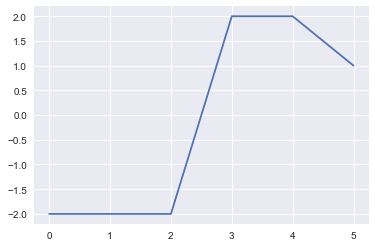

In [58]:
customer = 64

payments = get_payments(train.loc[customer, :])
trend = get_trend(payments)

plt.plot(range(6), payments)
print(trend)

In [71]:
train['PAY_TREND'] = res
train['PAY_TREND_CAT'] = pd.qcut(train['PAY_TREND'], q = 2, labels=['DEC', 'INC'])

train.groupby(['PAY_TREND_CAT', 'PAY_AVG_CAT'])['DEFAULT PAYMENT JAN'].mean().unstack()

PAY_AVG_CAT,PAY_EARLY,PAY_REG,PAY_LATE
PAY_TREND_CAT,,,
DEC,0.133381,0.109874,0.451956
INC,0.204298,0.182545,0.514000


In [ ]:
def aggregate_payment_weight(x):
    cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
    weights = [1, 2, 3, 4, 5, 6]
    ret = 0
    for c,w in zip(cols, weights):
        ret += x[c]*w
    return ret

In [76]:
train['PAY_LAST_2_CAT'] = pd.qcut(train.apply(avg_payments(['PAY_DEC', 'PAY_NOV']), axis=1), q=2, labels=['EARLY', 'LATE'])

In [78]:
train.groupby(['PAY_LAST_2_CAT', 'PAY_DEC'])['DEFAULT PAYMENT JAN'].count().unstack()

PAY_DEC,-2,-1,0,1,2,3,4,5,6,7,8
PAY_LAST_2_CAT,,,,,,,,,,,
EARLY,2478.0,4697.0,13184.0,1644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATE,NaN,400.0,NaN,1665.0,2399.0,291.0,70.0,23.0,10.0,6.0,17.0


# BILL AMT *

In [ ]:
bill_cols = ['BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP', 'BILL_AMT_OCT', 'BILL_AMT_NOV', 'BILL_AMT_DEC']

In [ ]:
def aggregate_bills(x):
    return sum([x[c] for c in bill_cols])


In [ ]:
train['BILL_SUM'] = train.apply(aggregate_bills, axis=1)

In [ ]:
sns.distplot(train['BILL_SUM'])

In [ ]:
train.loc[:, bill_cols + ['DEFAULT PAYMENT JAN']].corr()

In [ ]:
customer = 35
bills = train.loc[customer, bill_cols]
bills

# PAY AMT

In [ ]:
pay_amt_cols = ['PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP', 'PAY_AMT_OCT', 'PAY_AMT_NOV', 'PAY_AMT_DEC']

In [ ]:
def aggregate_payment_amt(x):
    return sum([x[c] for c in pay_amt_cols])

In [ ]:
train['PAY_AMT_SUM'] = train.apply(aggregate_payment_amt, axis=1)

In [ ]:
train['PAY_AMT_SUM'].describe()

In [ ]:
train.loc[:, pay_amt_cols + ['DEFAULT PAYMENT JAN']].corr()

In [ ]:
#1831
customer = 1832

train.loc[customer, :]

In [ ]:
def get_trend_from_bills(x):
    return get_trend([x[c] for c in bill_cols])

train['BILL_TREND'] = train.apply(get_trend_from_bills, axis=1)

In [ ]:
customer = train.sample()
customer = customer.index.item()

bills = train.loc[customer, bill_cols]
pay_amts = train.loc[customer, pay_amt_cols]

print("Default payment: {0}, BILL_TREND: {1}".format(train.loc[customer, 'DEFAULT PAYMENT JAN'], train.loc[customer, 'BILL_TREND']))
plt.plot(range(6), bills)
plt.show()
plt.plot(range(6), pay_amts)


# ANALYZE TEST DATA

In [ ]:
with open('data/test.csv') as f:
    clean_file = [line for line in map(lambda s: s.strip().replace('"', ''), f.readlines()) if line != '']

with open('data/test_clean.csv', 'w') as f:
    f.write('\n'.join(clean_file))

In [ ]:
test = pd.read_csv('data/test_clean.csv', sep=';')

In [ ]:
test.head()

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Sex in train dataset")
sns.countplot(x = 'SEX', data=train)
plt.subplot(1, 2, 2)
plt.title("Sex in test dataset")
sns.countplot(x = 'SEX', data=test)

In [ ]:
plt.subplot(1, 2, 1)
plt.title("LIMIT_BAL in train dataset")
sns.distplot(train['LIMIT_BAL'])
plt.subplot(1, 2, 2)
plt.title("LIMIT_BAL in test dataset")
sns.distplot(test['LIMIT_BAL'])

In [ ]:
plt.subplot(1, 2, 1)
plt.title("EDUCATION in train dataset")
sns.countplot(x = 'EDUCATION', data=train)
plt.subplot(1, 2, 2)
plt.title("EDUCATION in test dataset")
sns.countplot(x = 'EDUCATION', data=test)

In [ ]:
plt.subplot(1, 2, 1)
plt.title("MARRIAGE in train dataset")
sns.countplot(x = 'MARRIAGE', data=train)
plt.subplot(1, 2, 2)
plt.title("MARRIAGE in test dataset")
sns.countplot(x = 'MARRIAGE', data=test)

In [ ]:
test['AGE'] = train['BIRTH_DATE'].apply(get_age)

## Missing values

In [ ]:
test.info()

There are overall less missing values than in the train set. 

The columns affected by missing values are: 
- SEX (3) 
- EDUCATION (32)
- MARRIAGE (4) 
- BIRTH_DATE (3)

# Missing values analysis

In [ ]:
train.info()

## SEX

In [ ]:
missing_values_sex = train[train['SEX'].isnull()]

In [ ]:
len(missing_values_sex)

In [ ]:
sns.countplot(x = 'EDUCATION', data = missing_values_sex)

In [ ]:
sns.distplot(missing_values_sex['LIMIT_BAL'])

In [ ]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', data = missing_values_sex)

In [ ]:
sns.countplot(x = 'MARRIAGE', data=missing_values_sex)

In [ ]:
sns.barplot(y = 'PAY_AMT_SUM', x='SEX', data=train)

In [ ]:
sns.heatmap?

In [ ]:
pd.crosstab(train['SEX'], [train['MARRIAGE'], train['EDUCATION']], normalize=1)

In [ ]:
x = train[train['PAY_OCT']>= 8]

In [ ]:
sum(x['DEFAULT PAYMENT JAN']) / len(x), len(x)